ATTEMPT TO TOKINZE

In [1]:
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt
from math import log

In [2]:
IRONY = r'../datasets/irony/raw/'
#HATE = r'hate/'

In [130]:
def easy_token(textfile):

    tokens = []
    WORDS = re.compile(r')
    SPLIT = re.compile(r'[\s\.,;\"\-\_\|]') # TOOK OUT ? !

    for line in textfile.readlines():
        words = re.split(SPLIT, line)
        words = [w.lower() for w in words if (not w.startswith('@') and (w != ""))]
        #hashtags = [w for w in words if w.startswith('#')]
        tokens.append(words)
        
    return tokens

def token_counter(tokens, n= 10, inverse=False):
    plain = [t for l in tokens for t in l]
    counter = Counter(plain)
    if not inverse:
        return counter.most_common(n)
    else:
        return counter.most_common()[:-n-1:-1]
    
def zipf_law(tokens, ds_name=''):
    x = [log(x) for x in range(1, len(tokens)+1)]
    y = []

    ordered = token_counter(tokens, n=len(tokens))

    for tup in ordered:
        word, count = tup
        y.append(log(count))
    
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel('Log(Rank)')
    ax.set_ylabel('Log(Freq)')
    ax.set_title(f'Zipf Law for {ds_name} dataset')

In [122]:
df_texts = {}
dirs = ['emoji', 'irony']
for d in dirs:
    for file in os.listdir('../datasets/'+d+'/raw/'):
        if file.endswith('_text.txt'):
            textfile = open('../datasets/'+d+'/raw/'+file, encoding= 'utf-8')
            name = file[:file.index('_')]
            df_texts[d+'-'+name] = tokenize(textfile)

Let's check the less frequent tokens to spot errors

In [123]:
for k in df_texts.keys():
    print(k + 'dataset:\n')
    print(token_counter(df_texts[k], 20, inverse=True))
    print('\n\n\n')

emoji-testdataset:

[('#disasterartistsd…', 1), ('#preparefordisaster', 1), ('#theroom', 1), ('protest', 1), ('soren!', 1), ('#themratedrboyz', 1), ('swanees', 1), ('drina', 1), ('#climbingstairs', 1), ('#dtboy', 1), ('reacting', 1), ('#october3rd…', 1), ('doing!!!!', 1), ('carnita5', 1), (':moore', 1), ('#criandoandofamily', 1), ('agradecida', 1), ('bro!!!', 1), ('maccready', 1), ('#poets…', 1)]




emoji-traindataset:

[('five50', 1), ('#happylaborday', 1), ('nunez', 1), ('#bffweekend', 1), ('#rolltide', 1), ('#alabama', 1), ('chefking1921express', 1), ('nector', 1), ('thedabberchick', 1), ('timbers?', 1), ('#southbayla', 1), ('corban…', 1), ('#squints', 1), ('#bæ', 1), ('brody', 1), ('hangz', 1), ('ramon!traivs', 1), ('#mountaingirl', 1), ('#whotb…', 1), ('#whatshotontheblock', 1)]




emoji-valdataset:

[('48', 1), ('gen', 1), ('sanders', 1), ('kevj', 1), ('#brothermane!!', 1), ('labeled', 1), ('player', 1), ('keene', 1), ('vinci', 1), ('#doubledranchwear…', 1), ('#jewelryladyredri

Let's check Zipf's law

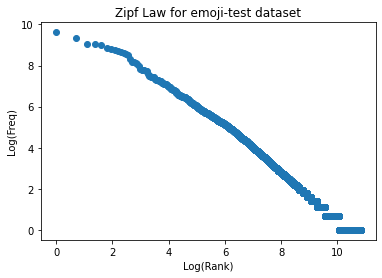

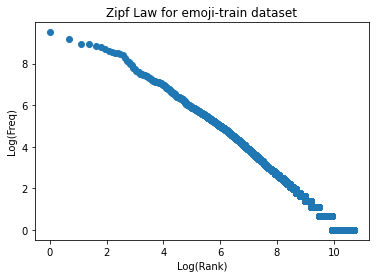

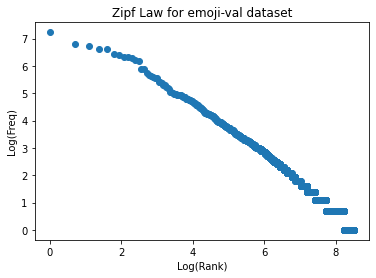

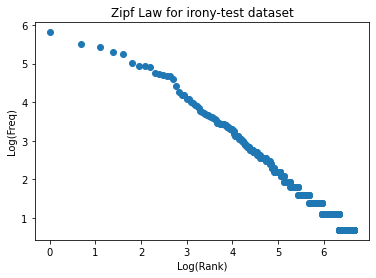

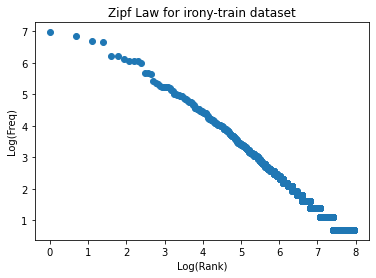

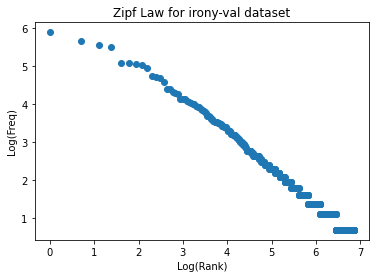

In [132]:
for k, value in df_texts.items():
    zipf_law(value, k)